In [ ]:
#METHOD -1

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import math

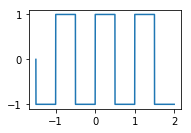

In [56]:
#First we write some functions with T=1 on which we want to do our experiment i.e to expand onto Fourier Series
Fs = 60000
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)
t = np.arange(-1.5, 2, 1/Fs)
plt.subplot(221); plt.plot(t, func1(t))

In [57]:
#Then apply Fourier Series to get coefficients
def fourierSeries(period, N):
    """Calculate the Fourier series coefficients up to the Nth harmonic"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

<StemContainer object of 3 artists>

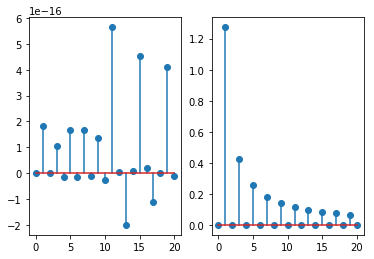

In [58]:
# And use it to calculate the coefficients up to the 20th order for the function:
t_period = np.arange(0, 1, 1/Fs)
F = fourierSeries(func1(t_period), 20)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])

<StemContainer object of 3 artists>

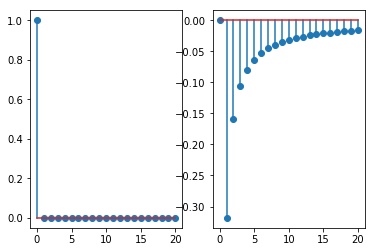

In [59]:
t_period = np.arange(0, 1, 1/Fs)
F = fourierSeries(func2(t_period), 20)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])

In [60]:
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

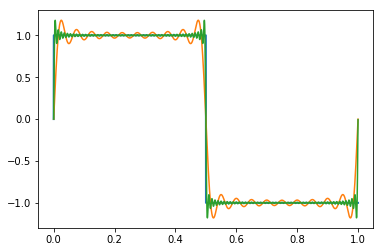

In [61]:
F = fourierSeries(func1(t_period), 100)
plt.plot(t_period, func1(t_period), label='Original', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstructed with 20 Harmonics')
plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstructed with 100 Harmonics')

In [ ]:
#METHOD - 2

In [2]:
import cv2
import numpy as np

In [3]:
img = cv2.imread('mandril_color.jpg',0)
img_data = np.asarray(img)
print(len(img_data))

512


In [ ]:
import math
#for k in range(len(img_data)):
valuef = 0
valueff = np.zeros(512)
for i in range(len(img_data)):
    for k in range(len(img_data)):  
        for n in range(len(img_data)):
            complexn = complex((img_data[i][n]*(np.exp(-2*n*k*np.pi)/512)), (img_data[i][n]*(np.exp(-2*n*k*np.pi)/512)))
            valuef = complexn + valuef
            valuef = np.asarray(valuef)
            abc = np.append(valueff, valuef)
        valueff = valuef
print(valueff.shape)
    #print (math.e**((math.pi)*1j))